In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=16,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_excel(r"E:\projects\ML_Data_Science\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\Covid cases in India.xlsx")

In [4]:
df.drop(["S. No."],axis=1,inplace=True)

In [5]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,955,0,11,0
1,Chhattisgarh,36,0,32,0
2,Delhi,2376,1,857,1
3,Gujarat,2624,0,265,3
4,Haryana,272,14,186,0
5,Himachal Pradesh,40,0,18,1
6,Karnataka,463,0,158,2
7,Kerala,448,7,338,0
8,Madhya Pradesh,1852,0,210,1
9,Maharashtra,6430,3,957,4


In [6]:
df["Total Cases"]=df["Total Confirmed cases (Indian National)"]+df["Total Confirmed cases ( Foreign National )"]

In [7]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,955,0,11,0,955
1,Chhattisgarh,36,0,32,0,36
2,Delhi,2376,1,857,1,2377
3,Gujarat,2624,0,265,3,2624
4,Haryana,272,14,186,0,286
5,Himachal Pradesh,40,0,18,1,40
6,Karnataka,463,0,158,2,463
7,Kerala,448,7,338,0,455
8,Madhya Pradesh,1852,0,210,1,1852
9,Maharashtra,6430,3,957,4,6433


In [8]:
total_cases_overall=df["Total Cases"].sum()
print(total_cases_overall)

23409


In [9]:
df["Active Cases"]=df["Total Cases"]-df["Cured"]

In [10]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,955,0,11,0,955,944
1,Chhattisgarh,36,0,32,0,36,4
2,Delhi,2376,1,857,1,2377,1520
3,Gujarat,2624,0,265,3,2624,2359
4,Haryana,272,14,186,0,286,100
5,Himachal Pradesh,40,0,18,1,40,22
6,Karnataka,463,0,158,2,463,305
7,Kerala,448,7,338,0,455,117
8,Madhya Pradesh,1852,0,210,1,1852,1642
9,Maharashtra,6430,3,957,4,6433,5476


In [11]:
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,955,0,11,0,955,944
1,Chhattisgarh,36,0,32,0,36,4
2,Delhi,2376,1,857,1,2377,1520
3,Gujarat,2624,0,265,3,2624,2359
4,Haryana,272,14,186,0,286,100
5,Himachal Pradesh,40,0,18,1,40,22
6,Karnataka,463,0,158,2,463,305
7,Kerala,448,7,338,0,455,117
8,Madhya Pradesh,1852,0,210,1,1852,1642
9,Maharashtra,6430,3,957,4,6433,5476


In [12]:
Total_Active_Cases=df.groupby("Name of State / UT")["Active Cases"].sum().sort_values(ascending=False).to_frame()

In [13]:
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,5476
Gujarat,2359
Madhya Pradesh,1642
Delhi,1520
Rajasthan,1473
Uttar Pradesh,1357
Andhra Pradesh,944
Tamil Nadu,820
Telengana,704


In [14]:
Total_Active_Cases.style.background_gradient(cmap="Reds")

,Active Cases
Name of State / UT,
Maharashtra,5476
Gujarat,2359
Madhya Pradesh,1642
Delhi,1520
Rajasthan,1473
Uttar Pradesh,1357
Andhra Pradesh,944
Tamil Nadu,820
Telengana,704


In [15]:
############## Panda Graph

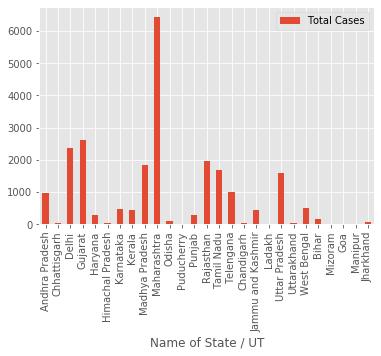

In [16]:
df.plot(kind='bar', x="Name of State / UT", y="Total Cases")

<BarContainer object of 27 artists>

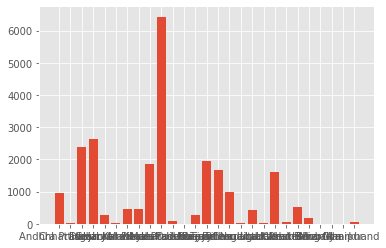

In [17]:
################ Matplotlib graph

plt.bar(df["Name of State / UT"],df["Total Cases"])

In [18]:
################### iplot

df.iplot(kind="bar", x="Name of State / UT", y="Total Cases")

In [19]:
################# plotly express

px.bar(df, x="Name of State / UT", y="Total Cases")

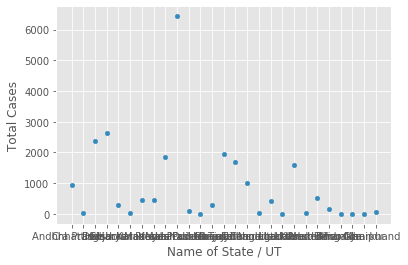

In [20]:
df.plot(kind="scatter",x="Name of State / UT",y="Total Cases")

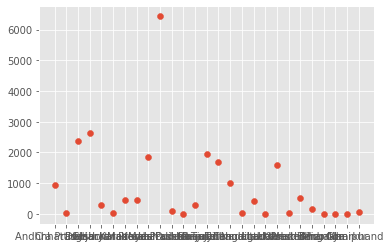

In [21]:
plt.scatter(df["Name of State / UT"],df["Total Cases"])

In [22]:
###################### Plotly
df.iplot(kind="scatter",x="Name of State / UT",y="Total Cases",mode='markers+lines')

In [23]:
######################### Object Oriented Method

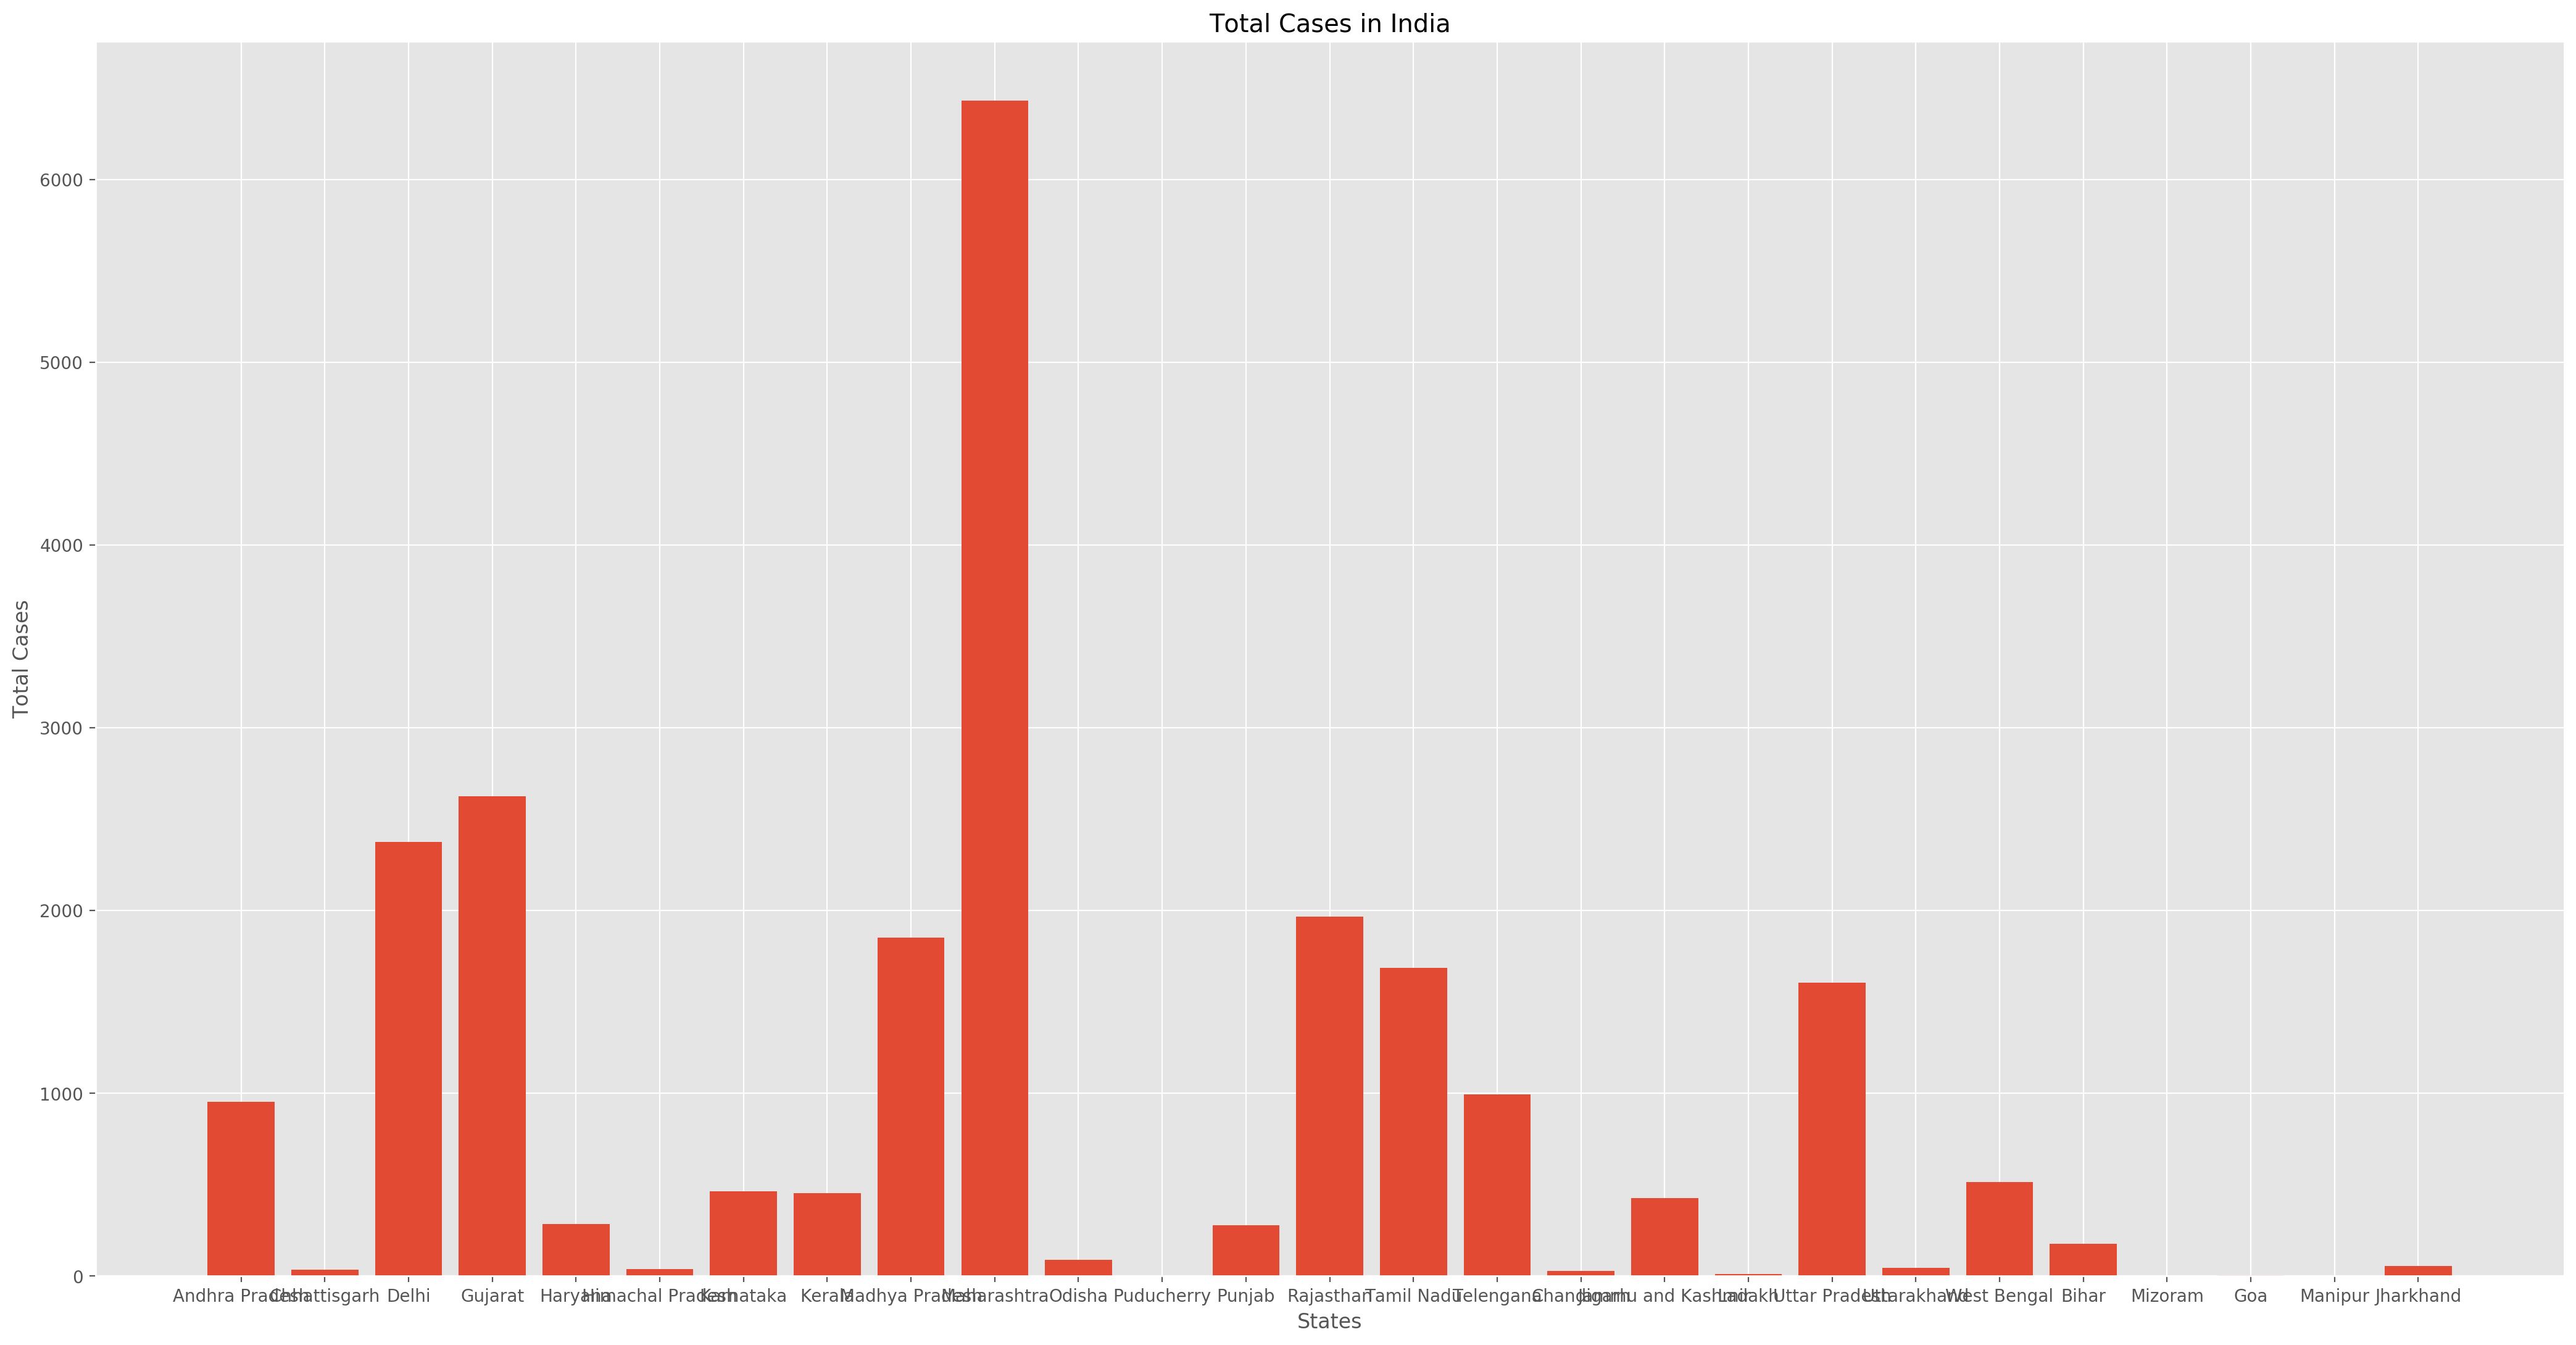

In [24]:
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df["Name of State / UT"],df["Total Cases"])
axes.set_title("Total Cases in India")
axes.set_xlabel("States")
axes.set_ylabel("Total Cases")
plt.show()

#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df["Name of State / UT"], y=df["Total Cases"]))
fig.update_layout(title='Total Cases in India', xaxis=dict(title="States"), yaxis=dict(title="Total Cases"))

In [25]:
Indian_Cord=pd.read_excel(r"E:\projects\ML_Data_Science\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\Indian Coordinates.xlsx")

In [26]:
Indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [27]:
df_full=pd.merge(Indian_Cord, df, on="Name of State / UT")
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,955,0,11,0,955,944
1,Delhi,28.669993,77.230004,2376,1,857,1,2377,1520
2,Haryana,28.450006,77.019991,272,14,186,0,286,100
3,Karnataka,12.570381,76.919997,463,0,158,2,463,305
4,Kerala,8.900373,76.569993,448,7,338,0,455,117
5,Maharashtra,19.250232,73.160175,6430,3,957,4,6433,5476
6,Punjab,31.519974,75.980003,277,0,70,1,277,207
7,Rajasthan,26.449999,74.639981,1964,2,493,0,1966,1473
8,Telengana,18.112400,79.019300,984,11,291,0,995,704
9,Tamil Nadu,12.920386,79.150042,1683,3,866,1,1686,820


In [28]:
map=folium.Map(location=[20,70], zoom_start=4, tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.02,popup=('<strong>State</strong>:'+str(name).capitalize()+'<br>''<strong>Total Cases</strong>:'+str(value)+'<br>'),color="red",fill_color="red",fill_opacity=0.3).add_to(map)

In [29]:
map